In [17]:
# Import libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import KFold, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [18]:
# Opening up the files
with open("../data/my_pickled_data.pkl","rb") as file:
    data_list=pickle.load(file)

In [19]:
X_train_2label=data_list[0]
y_train_2label=data_list[1]
X_test_2label=data_list[2]
y_test_2label=data_list[3]
X_train_3label=data_list[4]
y_train_3label=data_list[5]
X_test_3label=data_list[6]
y_test_3label=data_list[7]

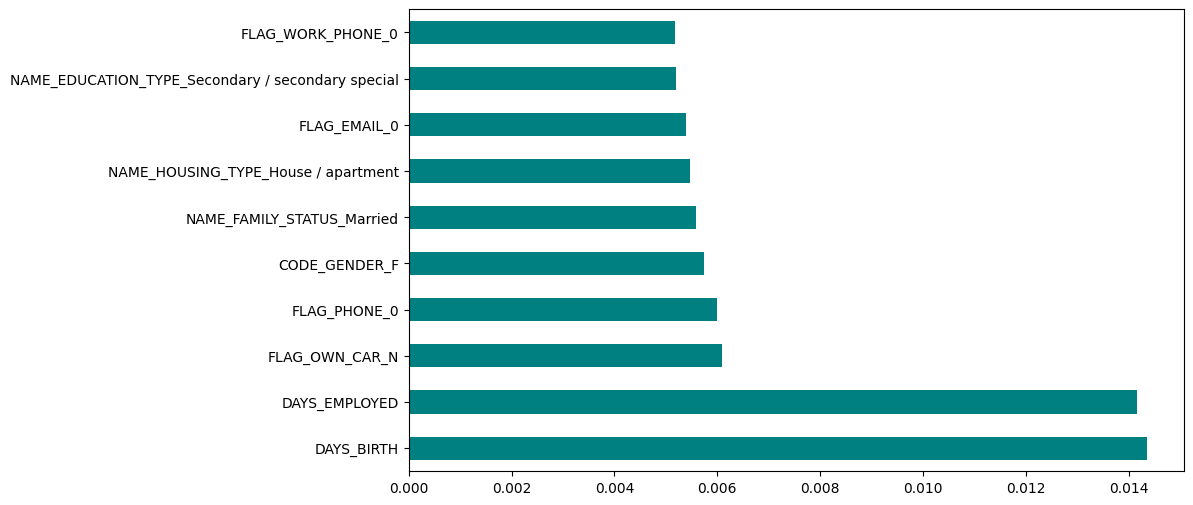

In [20]:
# Feature Selection by Filter method
# Information Gain
importances = mutual_info_classif(X_train_2label, y_train_2label)
feat_importances = pd.Series(importances, X_train_2label.columns)

# Select the top 10 features
top_10_feats = feat_importances.nlargest(10)

plt.figure(figsize=(10, 6))
top_10_feats.plot(kind='barh', color='teal')
plt.show()

In [21]:
# From here, we will use the top 10 features for the Neural Network Model
top_10 = top_10_feats.index.to_list()
print(top_10)

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_OWN_CAR_N', 'FLAG_PHONE_0', 'CODE_GENDER_F', 'NAME_FAMILY_STATUS_Married', 'NAME_HOUSING_TYPE_House / apartment', 'FLAG_EMAIL_0', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'FLAG_WORK_PHONE_0']


In [22]:
# Select only the top 10 features
X_train_2label_top_10 = X_train_2label.loc[:, top_10]
X_train_3label_top_10 = X_train_3label.loc[:, top_10]

X_test_2label_top_10 = X_test_2label.loc[:, top_10]
X_test_3label_top_10 = X_test_3label.loc[:, top_10]

In [23]:
# Checking shapes to make sure everything fits
# X_train.info() 10 cols
X_train_2label_top_10.shape,X_test_2label_top_10.shape,y_train_2label.shape,y_test_2label.shape

((29245, 10), (7212, 10), (29245,), (7212,))

In [24]:
# We will then test by 2 / 3 labels
# Starting with 2 labels
# Label encoding y_train and y_test

le = LabelEncoder()
le.fit(y_train_2label)
y_train_encoded = le.transform(y_train_2label)
y_test_encoded = le.transform(y_test_2label)

In [25]:
# Set random seed
tf.random.set_seed(0)

# 1. Create the model using the Sequential API
# Input Layer: number of features
# For hidden layer: the number of neurons should be in between the input data dimension and the output data dimension.
# Last layer: number of classes
model = keras.Sequential([layers.Dense(10, activation='relu'),
                          layers.Dense(6, activation='relu'),
                          layers.Dense(1, activation='sigmoid')])

# 2. Compile the model
model.compile(loss="binary_crossentropy",
              optimizer= "adam",
              metrics=["accuracy"])

# 3. Fit the model
model.fit(X_train_2label_top_10, y_train_encoded, epochs=5)

Epoch 1/5


914/914 [==============================] - 2s 1ms/step - loss: 0.1381 - accuracy: 0.9725
Epoch 2/5
914/914 [==============================] - 1s 1ms/step - loss: 0.1119 - accuracy: 0.9771
Epoch 3/5
914/914 [==============================] - 1s 1ms/step - loss: 0.1110 - accuracy: 0.9771
Epoch 4/5
914/914 [==============================] - 1s 1ms/step - loss: 0.1102 - accuracy: 0.9771
Epoch 5/5
914/914 [==============================] - 1s 1ms/step - loss: 0.1099 - accuracy: 0.9771


In [26]:
# Evaluate Model with test data
score_2label = model.evaluate(x=X_test_2label_top_10, y=y_test_encoded)
print("2-label Test loss:", score_2label[0])
print("2-label Test Accuracy: ", score_2label[1])

226/226 [==============================] - 0s 1ms/step - loss: 0.1163 - accuracy: 0.9753
2-label Test loss: 0.11628855019807816
2-label Test Accuracy:  0.9753189086914062


In [27]:
# Now 3 labels
# Label encoding y_train and y_test

le = LabelEncoder()
le.fit(y_train_3label)
y_train_encoded = le.transform(y_train_3label)
y_test_encoded = le.transform(y_test_3label)

In [28]:
# Set random seed
tf.random.set_seed(0)

# 1. Create the model using the Sequential API
# Input Layer: number of features
# For hidden layer: the number of neurons should be in between the input data dimension and the output data dimension.
# Last layer: number of classes
# sparse categorical crossentropy is appropriate for cases where the classes are mutually exclusive, meaning each sample belongs to only one class.
model = keras.Sequential([layers.Dense(10, activation='relu'),
                          layers.Dense(6, activation='relu'),
                          layers.Dense(3, activation='softmax')])

# 2. Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adam",
              metrics=['sparse_categorical_accuracy'])

# 3. Fit the model
model.fit(X_train_3label_top_10, y_train_encoded, epochs=5)

Epoch 1/5
914/914 [==============================] - 2s 1ms/step - loss: 0.5210 - sparse_categorical_accuracy: 0.8136
Epoch 2/5
914/914 [==============================] - 1s 1ms/step - loss: 0.4173 - sparse_categorical_accuracy: 0.8849
Epoch 3/5
914/914 [==============================] - 1s 1ms/step - loss: 0.4154 - sparse_categorical_accuracy: 0.8849
Epoch 4/5
914/914 [==============================] - 1s 1ms/step - loss: 0.4147 - sparse_categorical_accuracy: 0.8849
Epoch 5/5
914/914 [==============================] - 1s 1ms/step - loss: 0.4144 - sparse_categorical_accuracy: 0.8849


In [29]:
# Evaluate Model with test data
score_3label = model.evaluate(x=X_test_3label_top_10, y=y_test_encoded)
print("3-label Test loss:", score_3label[0])
print("3-label Test Accuracy: ", score_3label[1])

226/226 [==============================] - 0s 1ms/step - loss: 0.4169 - sparse_categorical_accuracy: 0.8853
3-label Test loss: 0.41690629720687866
3-label Test Accuracy:  0.8853300213813782


In [30]:
# In Summary
print("2-label Test loss:", score_2label[0])
print("2-label Test Accuracy: ", score_2label[1])
print("")
print("3-label Test loss:", score_3label[0])
print("3-label Test Accuracy: ", score_3label[1])
# 2 label model performed better

2-label Test loss: 0.11628855019807816
2-label Test Accuracy:  0.9753189086914062

3-label Test loss: 0.41690629720687866
3-label Test Accuracy:  0.8853300213813782
